Este exemplo foi inspirado no exemplo 4.2.2 do livro (Lewis; Nithiarasu;Seetharamu,2004), cujo título é: Fundamentals of the finite element method for heat and fluid flow.

O intuito aqui é ter conhecimento do comportamento de um problema com convecção e que seja estacionário.

In [30]:
# Importar a biblioteca do Firedrake.

try:
    import firedrake
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/firedrake-install-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
    import firedrake


In [31]:
import os

os.environ["OMP_NUM_THREADS"] = "1" # Isso é solicitado no manual do Firedrake, para que o mesmo não apresente os alertas que poderão ocorrer com o OMP.


In [32]:
import matplotlib.pyplot as plt
from firedrake import *
import numpy as np

In [33]:
num_elements = 10 # Quantidade de elementos que serão usadas nesta malha;
mesh = UnitIntervalMesh(num_elements) # Armazenamento da malha unidimensional com os elementos definidos na variável num_elements.
x, = mesh.coordinates # Definir x como coordenada da malha.

In [34]:
degree = 1 # Grau do polinômio;
V = FunctionSpace(mesh, "CG", degree) # "CG" denota os elementos finitos Lagrangeanos.

In [35]:
u = TrialFunction(V) # Função candidata à solução;
v = TestFunction(V) # Função peso;
solution = Function(V) # Esta é a variável que armazenará a solução do PV.

In [36]:
# Definir as constantes que serão usadas no PV:

A = Constant(1)
k = Constant(0.01)
b = Constant(2)
G = Constant(0)

a = (k * A * inner(grad(u), grad(v)) * dx) + (b * inner(grad(u)[0], v) * dx) # [0] denota o primeiro resultado de interesse.

f = inner(G, v) * dx

In [37]:
c0 = DirichletBC(V, 0, 1) # Condição de contorno do lado esquerdo, representado por 1;

c1 = DirichletBC(V, 1, 2) # Condição de contorno do lado direito, representado por 2.


In [38]:
# Solver

solver_parameters = {
    "ksp_type": "preonly",
    "pc_type": "lu" # Pre-condicionador LU.
}

In [39]:
problem = LinearVariationalProblem(a, f, solution, bcs = [c0, c1])

solver = LinearVariationalSolver(problem, solver_parameters = solver_parameters)

In [40]:
solver.solve()

In [41]:
solution_values = assemble(solution).dat.data # Resultado escrito em vetor

x_values = assemble(x).dat.data # Coordenadas da malha em vetor.

print(solution_values)

[ 0.         -0.34513091  0.07669576 -0.43887016  0.19126596 -0.57890041
  0.36241404 -0.7880814   0.6180797  -1.10056165  1.        ]


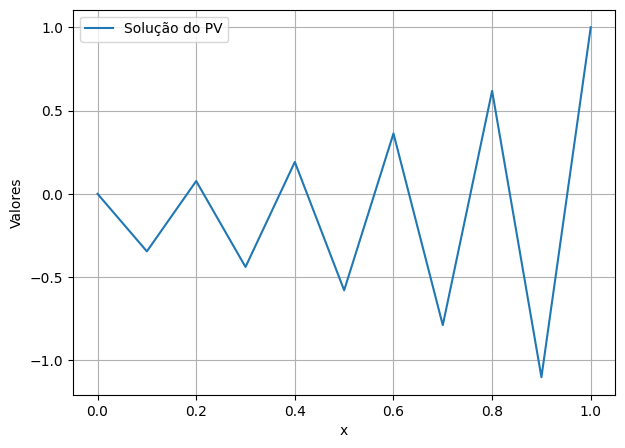

In [42]:
plt.figure(figsize = (7, 5))

plt.plot(x_values, solution_values, "-", label = "Solução do PV")

plt.grid()
plt.legend(loc = "best")

plt.xlabel("x")
plt.ylabel("Valores")

plt.show()